In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

# Get and Prepare Data

In [12]:
X, y = load_iris(return_X_y=True, as_frame=True)
# Drop third class, since we want a binary classifaction problem here
y = y[y != 2]
X = X.loc[y.index]
# Split for eval
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
55,5.7,2.8,4.5,1.3
88,5.6,3.0,4.1,1.3
26,5.0,3.4,1.6,0.4
42,4.4,3.2,1.3,0.2
69,5.6,2.5,3.9,1.1


# Reduce to 2D

In [13]:
N_COMPONENTS = 2

pca = PCA(n_components=N_COMPONENTS, random_state=42)
# Transform features using PCA
X_train = pd.DataFrame(pca.fit_transform(X=X_train), columns=[f"PC{i+1}" for i in range(N_COMPONENTS)], index=X_train.index)
# Same for Test Set
X_test = pd.DataFrame(pca.transform(X=X_test), columns=[f"PC{i+1}" for i in range(N_COMPONENTS)], index=X_test.index)

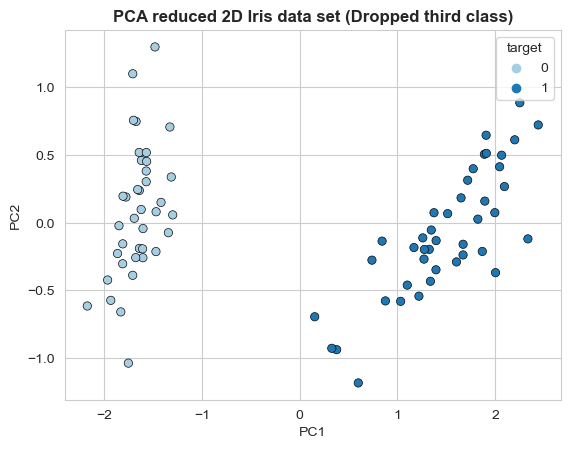

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_title("PCA reduced 2D Iris data set (Dropped third class)", fontweight="bold")
sns.scatterplot(data=X_train, x="PC1", y="PC2", hue=y_train, palette="Paired", edgecolor="black", ax=ax)
plt.show()

# Fit Classifier

In [15]:
clf = SVC(kernel="linear", random_state=42)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [16]:
clf.support_vectors_

array([[-1.34427143, -0.07338649],
       [ 0.15379882, -0.69415549]])

In [17]:
def draw_decision_boundary(clf, X):
    """
    Draw decision boundary, i.e. X@w.T + b = 0.
    This is equivalent to x_2 = -w_1/w_2 * x_1 - b/w_2
    """
    w = clf.coef_
    b = clf.intercept_
    w_1 = w[0,0]
    w_2 = w[0,1]

    x_2 = (-w_1/w_2)*X.values - b/w_2
    return x_2

# Get prediction for y_pred
y_pred = clf.predict(X_test)
acc = accuracy_score(y_true=y_test, y_pred=y_pred)

# Visualize Results

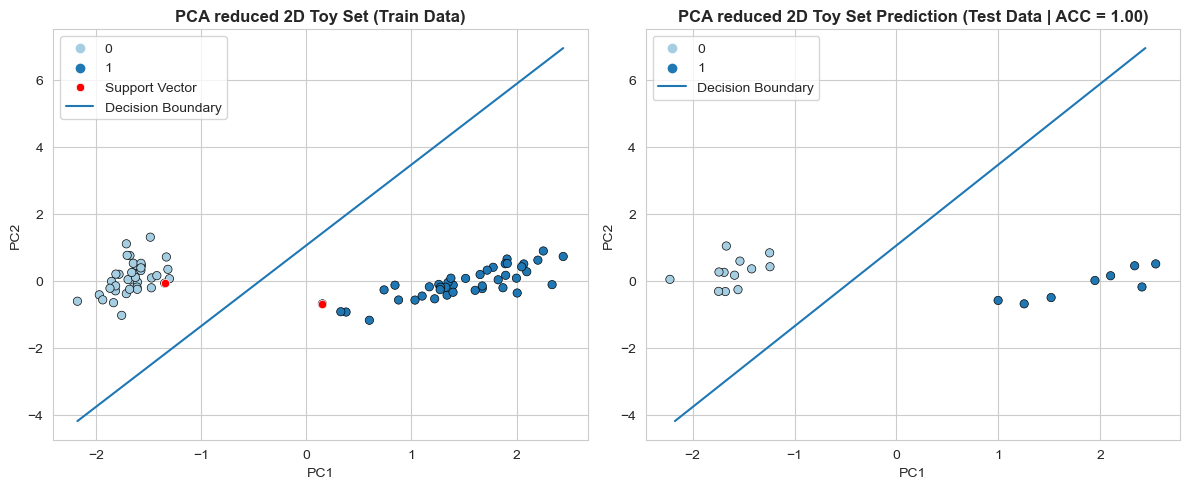

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
# Plot Settings for Train Data
axes[0].set_title(f"PCA reduced 2D Toy Set (Train Data)", fontweight="bold")
sns.scatterplot(data=X_train, x="PC1", y="PC2", hue=y_train, palette="Paired", edgecolor="black", ax=axes[0])
sns.scatterplot(x=clf.support_vectors_[:,0], y=clf.support_vectors_[:,1], marker="o", color="red", label="Support Vector", ax=axes[0])
sns.lineplot(x=X_train["PC1"], y=draw_decision_boundary(clf, X_train["PC1"]), ax=axes[0], label="Decision Boundary")
# Plot Settings for Test Data
axes[1].set_title(f"PCA reduced 2D Toy Set Prediction (Test Data | ACC = {acc:.2f})", fontweight="bold")
sns.scatterplot(data=X_test, x="PC1", y="PC2", hue=y_pred, palette="Paired", edgecolor="black", ax=axes[1])
sns.lineplot(x=X_train["PC1"], y=draw_decision_boundary(clf, X_train["PC1"]), ax=axes[1], label="Decision Boundary")
plt.tight_layout()
plt.show()